# 전처리 통합본

In [250]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set the font to AppleGothic to display Korean characters on macOS
plt.rcParams["font.family"] = "NanumGothic Eco"
plt.rcParams["axes.unicode_minus"] = False  
pd.options.display.max_rows = 20

# 1. Member_data 전처리 

In [251]:
df = pd.read_csv("/home/piai/바탕화면/_/Bigdata final project/member_data.csv")

df

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal
...,...,...,...,...,...,...,...,...
11550,999682432,탈퇴,수지구-동천동,여,47.0,미신청,.,normal
11551,999721408,정상회원,수지구-동천동,여,43.0,미신청,.,normal
11552,999738112,정상회원,수지구-성복동,여,67.0,미신청,.,normal
11553,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11555 entries, 0 to 11554
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   회원번호         11555 non-null  int64  
 1   조합원상태        11555 non-null  object 
 2   주소           11555 non-null  object 
 3   성별           11553 non-null  object 
 4   연령           11553 non-null  float64
 5   배송서비스신청여부    11555 non-null  object 
 6   모바일알람여부      11555 non-null  object 
 7   Gold_member  11555 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 722.3+ KB


In [253]:
#회원번호 object로 변경
#모바일알람여부 '.'을 '미수신'으로 변경
df['회원번호'] = df['회원번호'].astype('object')
df['모바일알람여부'] = df['모바일알람여부'].replace('.', '미수신')

In [254]:
df

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,미수신,normal
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,미수신,normal
2,1000122304,정상회원,광주-기타,여,38.0,미신청,미수신,normal
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,미수신,normal
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,미수신,normal
...,...,...,...,...,...,...,...,...
11550,999682432,탈퇴,수지구-동천동,여,47.0,미신청,미수신,normal
11551,999721408,정상회원,수지구-동천동,여,43.0,미신청,미수신,normal
11552,999738112,정상회원,수지구-성복동,여,67.0,미신청,미수신,normal
11553,999754816,정상회원,수지구-상현동,여,44.0,신청,미수신,normal


## 전처리 전 변수 분포도

정상회원     11413
탈퇴         139
탈퇴신청         1
탈퇴처리중        2
Name: 조합원상태, dtype: int64


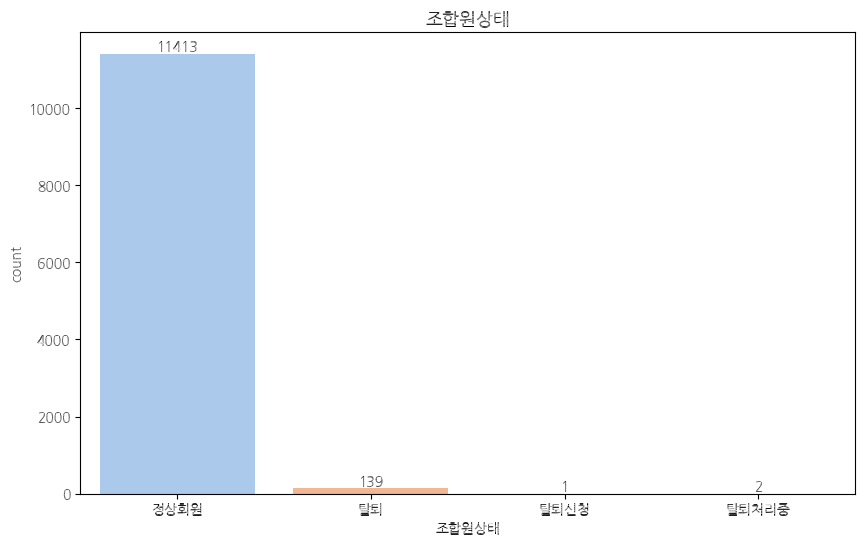

In [255]:
#조합원상태 수정전 그래프
plc_counts = df['조합원상태'].value_counts().sort_index()
print(plc_counts)

fig, ax = plt.subplots(figsize=(10, 6))

colors = sns.color_palette("pastel", len(plc_counts))

p = sns.countplot(x='조합원상태', data=df, ax=ax, palette=colors, order=plc_counts.index)
p.bar_label(p.containers[0], fmt='%d')  

ax.set_title('조합원상태', fontsize=13) 
plt.show()

남      668
여    10885
Name: 성별, dtype: int64


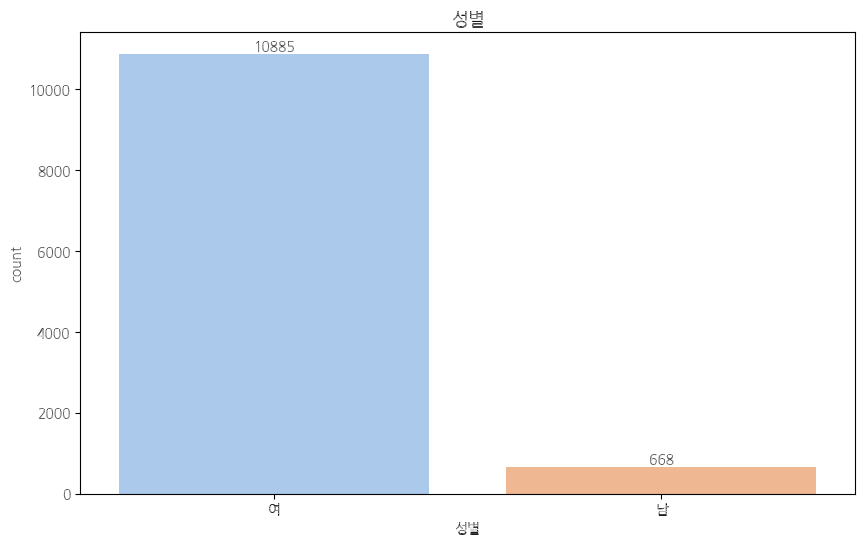

In [256]:
#성별 수정전 그래프
plc_counts = df['성별'].value_counts().sort_index()
print(plc_counts)

fig, ax = plt.subplots(figsize=(10, 6))

colors = sns.color_palette("pastel", len(plc_counts))  

p = sns.countplot(x='성별', data=df, ax=ax, palette=colors, order=['여', '남'])  
p.bar_label(p.containers[0], fmt='%d')  

ax.set_title('성별', fontsize=13) 
plt.show()

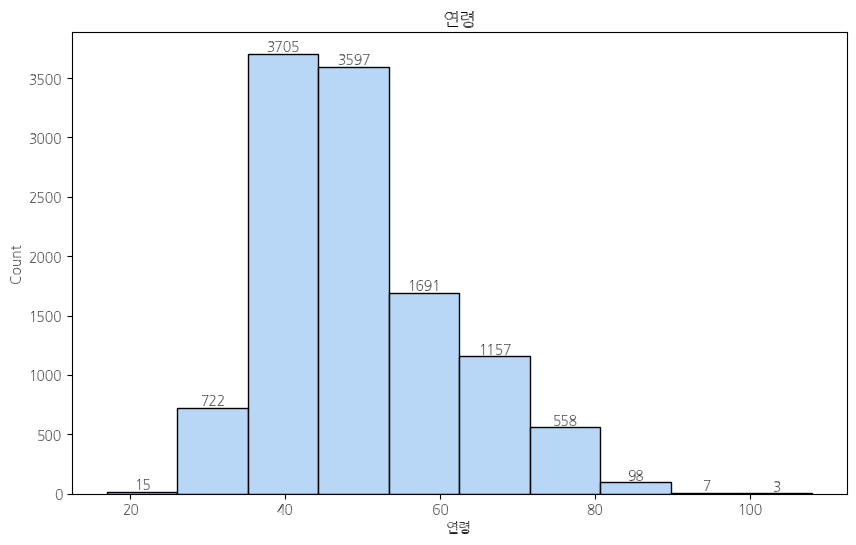

In [257]:
#연령 그래프
fig, ax = plt.subplots(figsize=(10, 6))

colors = sns.color_palette("pastel", 1)
sns.histplot(df['연령'], bins=10, kde=False, ax=ax, color=colors[0])  

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

ax.set_title('연령', fontsize=13)  

plt.show()

미신청    10512
신청      1043
Name: 배송서비스신청여부, dtype: int64


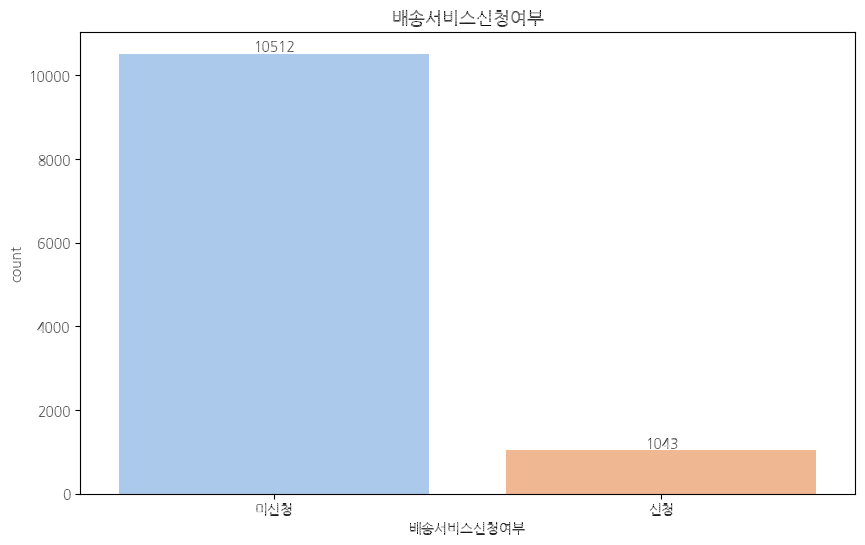

In [258]:
#배송서비스신청여부 그래프
plc_counts = df['배송서비스신청여부'].value_counts().sort_index()
print(plc_counts)

fig, ax = plt.subplots(figsize=(10, 6))

colors = sns.color_palette("pastel", len(plc_counts))  

p = sns.countplot(x='배송서비스신청여부', data=df, ax=ax, palette=colors)
p.bar_label(p.containers[0], fmt='%d')  

ax.set_title('배송서비스신청여부', fontsize=13) 
plt.show()

미수신    10653
수신       902
Name: 모바일알람여부, dtype: int64


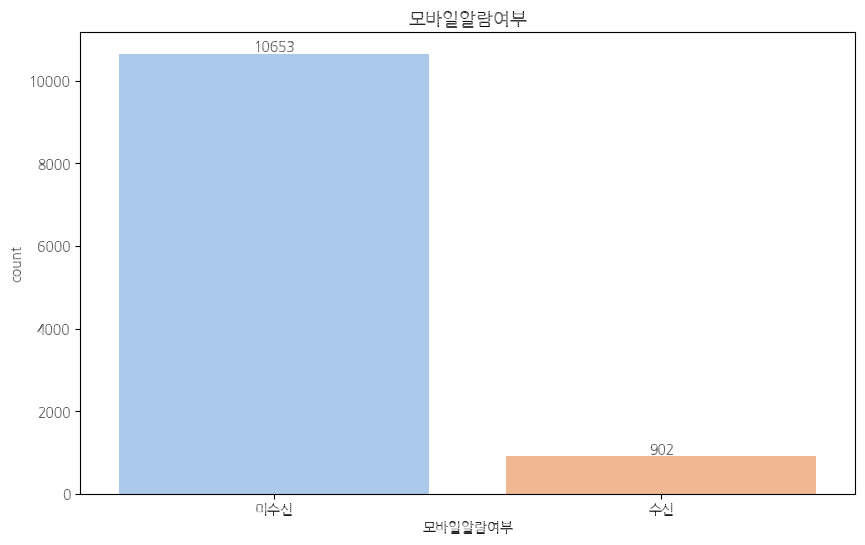

In [259]:
#모바일알람 신청 여부 그래프
plc_counts = df['모바일알람여부'].value_counts().sort_index()
print(plc_counts)

fig, ax = plt.subplots(figsize=(10, 6))

colors = sns.color_palette("pastel", len(plc_counts))

p = sns.countplot(x='모바일알람여부', data=df, ax=ax, palette=colors, order=plc_counts.index)
p.bar_label(p.containers[0], fmt='%d')  

ax.set_title('모바일알람여부', fontsize=13) 
plt.show()

VIP         205
normal    11350
Name: Gold_member, dtype: int64


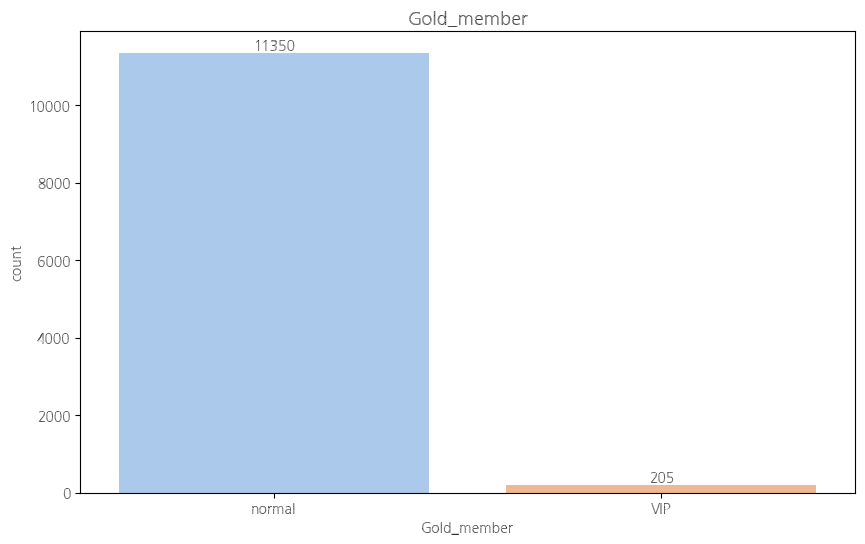

In [260]:
#Gold_member 그래프
plc_counts = df['Gold_member'].value_counts().sort_index()
print(plc_counts)

fig, ax = plt.subplots(figsize=(10, 6))

colors = sns.color_palette("pastel", len(plc_counts))

p = sns.countplot(x='Gold_member', data=df, ax=ax, palette=colors, order=['normal', 'VIP'])
p.bar_label(p.containers[0], fmt='%d')  

ax.set_title('Gold_member', fontsize=13) 
plt.show()

# 이상치,결측치 제거 및 값 수정

In [261]:
df.isnull().sum()

회원번호           0
조합원상태          0
주소             0
성별             2
연령             2
배송서비스신청여부      0
모바일알람여부        0
Gold_member    0
dtype: int64

## 조합원상태

In [262]:
#탈퇴처리중, 탈퇴 신청 -> 탈퇴 
df['조합원상태'] = df['조합원상태'].replace('탈퇴신청', '탈퇴')
df['조합원상태'] = df['조합원상태'].replace('탈퇴처리중', '탈퇴')
print(df['조합원상태'].value_counts())

정상회원    11413
탈퇴        142
Name: 조합원상태, dtype: int64


## 연령

In [263]:
# Filter rows where '연령' is missing
missing_age_rows = df[df["연령"].isnull()]

missing_age_rows


,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member
5983,383599936,정상회원,기타-기타,여,NaN,미신청,미수신,normal
7098,545864448,정상회원,기타-기타,NaN,NaN,미신청,미수신,normal


In [264]:
# Remove rows with missing values in the '연령' column
df = df.dropna(subset=["연령"])

df.isnull().sum()

회원번호           0
조합원상태          0
주소             0
성별             1
연령             0
배송서비스신청여부      0
모바일알람여부        0
Gold_member    0
dtype: int64

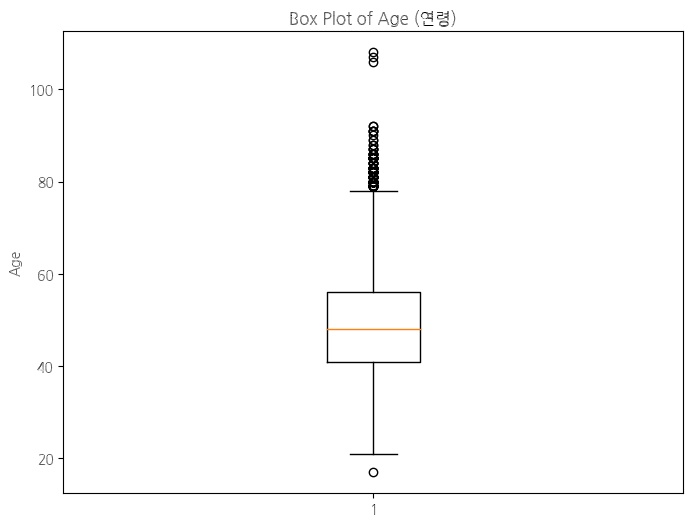

In [265]:
# 결측값 제거 및 숫자형 변환 후 박스플롯 생성
plt.figure(figsize=(8, 6))
plt.boxplot(df["연령"].dropna())  # 결측값 제거
plt.title("Box Plot of Age (연령)")
plt.ylabel("Age")
plt.show()

In [266]:
#100세 이상 데이터 확인
print(df[df['연령'] >= 100])

            회원번호 조합원상태       주소 성별     연령 배송서비스신청여부 모바일알람여부 Gold_member
4504  1670620864  정상회원  분당구-수내동  남  108.0       미신청     미수신      normal
7797   623725504  정상회원    기타-기타  여  107.0       미신청     미수신      normal
8823   742461248  정상회원  분당구-정자동  남  106.0       미신청     미수신      normal


In [267]:
df.describe()

,연령
count,11553.000000
mean,49.704233
std,11.563223
min,17.000000
25%,41.000000
50%,48.000000
75%,56.000000
max,108.000000


In [268]:
#연령(float)->연령(int)
df['연령'] = df['연령'].astype('int')

## 성별

In [269]:
# Filter rows where '연령' is missing
missing_age_rows = df[df["성별"].isnull()]

missing_age_rows


,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member
3666,1527053696,정상회원,기타-기타,NaN,45,미신청,미수신,normal


In [270]:
# Remove rows with missing values in the '연령' column
df = df.dropna(subset=["성별"])

# Display the DataFrame after removing rows with missing '연령' values
df.isnull().sum()

회원번호           0
조합원상태          0
주소             0
성별             0
연령             0
배송서비스신청여부      0
모바일알람여부        0
Gold_member    0
dtype: int64

## 조합원 상태

In [271]:
df["조합원상태"] = df["조합원상태"].replace(['탈퇴처리중', '탈퇴신청'], '탈퇴')

# Display the updated DataFrame
df["조합원상태"].unique()

array(['정상회원', '탈퇴'], dtype=object)

## 주소

In [272]:
#주소 데이터 확인
pd.options.display.max_rows = None
print(df['주소'].value_counts())

수지구-풍덕천동       3188
수지구-상현동        1601
수지구-신봉동        1422
기타-기타          1123
수지구-동천동         924
수지구-성복동         735
기흥구-보정동         259
수지구-죽전동         244
수원 영통구-기타       216
서울 강남구-기타       172
분당구-정자동         123
서울 송파구-기타        95
분당구-구미동          89
수지구-기타           84
분당구-판교동          82
화성-기타            75
기흥구-마북동          63
기흥구-신갈동          61
분당구-수내동          60
기흥구-영덕동          59
분당구-서현동          51
기흥구-언남동          49
분당구-야탑동          45
분당구-백현동          44
분당구-중동           39
광주-기타            39
기흥구-동백동          37
분당구-금곡동          32
광주-오포읍           31
분당구-분당동          31
분당구-이매동          31
기흥구-중동           30
분당구-삼평동          29
처인구-기타           27
기흥구-청덕동          25
수원 팔달구-기타        23
수원 장안구-기타        23
기흥구-상하동          21
기흥구-죽전동          17
기흥구-보라동          17
수원 권선구-기타        16
기흥구-상갈동          15
기흥구-공세동          14
하남-기타            13
기흥구-구갈동          12
수정구-위례(창곡)동      12
처인구-역북동           9
처인구-모현면           9
수원 장안구-정자동        7
분당구-궁내동           7


In [273]:
# '주소' 열을 문자열로 변환하여 NaN 등 비문자형 자료로 인한 오류 방지
df['주소'] = df['주소'].astype(str)

# 문자열 교체 작업
df['주소'] = df['주소'].str.replace('기타-동백동', '기흥구-동백동', regex=False)
df['주소'] = df['주소'].str.replace('기타-율동', '분당구-율동', regex=False)
df['주소'] = df['주소'].str.replace('기타-성남동', '중원구-성남동', regex=False)
df['주소'] = df['주소'].str.replace('기타-금광동', '중원구-금광동', regex=False)
df['주소'] = df['주소'].str.replace('기타-신흥동', '수정구-신흥동', regex=False)
df['주소'] = df['주소'].str.replace('기타-동천동', '수지구-동천동', regex=False)
df['주소'] = df['주소'].str.replace('기타-태평동', '수정구-태평동', regex=False)
df['주소'] = df['주소'].str.replace('기타-궁내동', '분당구-궁내동', regex=False)
df['주소'] = df['주소'].str.replace('기타-보라동', '기흥구-보라동', regex=False)
df['주소'] = df['주소'].str.replace('화성-보라동', '기흥구-보라동', regex=False)
df['주소'] = df['주소'].str.replace('기타-은행동', '중원구-은행동', regex=False)
df['주소'] = df['주소'].str.replace('기타-중앙동', '서울 관악구-성앙동', regex=False)

# 최빈값 사용해 특정 값 대체
print(df[df['주소'].str.contains('금곡동', na=False)]['주소'].mode()[0])  # 최빈값 출력
df['주소'] = df['주소'].str.replace('기타-금곡동', '분당구-금곡동', regex=False)

# '기타-비조합원' 값을 '기타-기타'로 대체
print(df[df['주소'] == '기타-비조합원'])
df['주소'] = df['주소'].str.replace('기타-비조합원', '기타-기타', regex=False)


분당구-금곡동
            회원번호 조합원상태       주소 성별  연령 배송서비스신청여부 모바일알람여부 Gold_member
4502  1670400000    탈퇴  기타-비조합원  남  36       미신청      수신      normal


In [274]:
print(df['주소'].value_counts())

수지구-풍덕천동       3188
수지구-상현동        1601
수지구-신봉동        1422
기타-기타          1124
수지구-동천동         925
수지구-성복동         735
기흥구-보정동         259
수지구-죽전동         244
수원 영통구-기타       216
서울 강남구-기타       172
분당구-정자동         123
서울 송파구-기타        95
분당구-구미동          89
수지구-기타           84
분당구-판교동          82
화성-기타            75
기흥구-마북동          63
기흥구-신갈동          61
분당구-수내동          60
기흥구-영덕동          59
분당구-서현동          51
기흥구-언남동          49
분당구-야탑동          45
분당구-백현동          44
광주-기타            39
분당구-중동           39
기흥구-동백동          38
분당구-금곡동          33
분당구-이매동          31
광주-오포읍           31
분당구-분당동          31
기흥구-중동           30
분당구-삼평동          29
처인구-기타           27
기흥구-보라동          25
기흥구-청덕동          25
수원 장안구-기타        23
수원 팔달구-기타        23
기흥구-상하동          21
기흥구-죽전동          17
수원 권선구-기타        16
기흥구-상갈동          15
기흥구-공세동          14
하남-기타            13
기흥구-구갈동          12
수정구-위례(창곡)동      12
처인구-모현면           9
처인구-역북동           9
분당구-궁내동           8
기흥구-서천동           7


In [275]:
df[['주소대분류', '주소소분류']] = df['주소'].str.split('-', expand=True)
df['주소대분류'] = df['주소대분류'].str.replace('수지구', '용인 수지구', regex=False)
df['주소대분류'] = df['주소대분류'].str.replace('기흥구', '용인 기흥구', regex=False)
df['주소대분류'] = df['주소대분류'].str.replace('분당구', '성남 분당구', regex=False)
df['주소대분류'] = df['주소대분류'].str.replace('처인구', '용인 처인구', regex=False)
df['주소대분류'] = df['주소대분류'].str.replace('중원구', '성남 중원구', regex=False)
df['주소대분류'] = df['주소대분류'].str.replace('수정구', '성남 수정구', regex=False)

In [276]:
df['주소대분류'].value_counts()

용인 수지구    8199
기타        1124
용인 기흥구     705
성남 분당구     673
수원 영통구     216
서울 강남구     173
서울 송파구      95
화성          75
용인 처인구      74
광주          73
수원 장안구      30
성남 중원구      28
성남 수정구      26
수원 팔달구      23
수원 권선구      18
하남          14
서울 관악구       6
Name: 주소대분류, dtype: int64

In [277]:
df['주소소분류'].value_counts()

풍덕천동       3188
기타         1923
상현동        1601
신봉동        1422
동천동         925
성복동         735
죽전동         261
보정동         259
정자동         130
구미동          89
판교동          82
중동           69
마북동          63
신갈동          61
수내동          60
영덕동          59
서현동          51
언남동          49
야탑동          45
백현동          44
동백동          38
금곡동          35
오포읍          31
이매동          31
분당동          31
삼평동          29
청덕동          25
보라동          25
상하동          21
상갈동          15
공세동          14
구갈동          12
위례(창곡)동      12
모현면           9
역북동           9
궁내동           8
서천동           7
성앙동           6
고림동           6
상대원동          5
삼가동           5
유방동           5
금광동           5
여수동           5
성남동           5
지곡동           4
김량장동          4
산성동           4
원삼면           4
신흥동           4
은행동           3
도촌동           3
하대원동          3
마평동           3
단대동           2
율동            2
태평동           2
남사면           1
복정동           1
이동면           1
위례동           1
Name: 주소소분류, dtype: int6

In [278]:
df = df.drop(columns=['주소'])

In [279]:
df.to_csv('preprocessed_member.csv', index=False, encoding='euc-kr')

## 이상치/결측치 처리 후 변수 분포도

정상회원    11410
탈퇴        142
Name: 조합원상태, dtype: int64


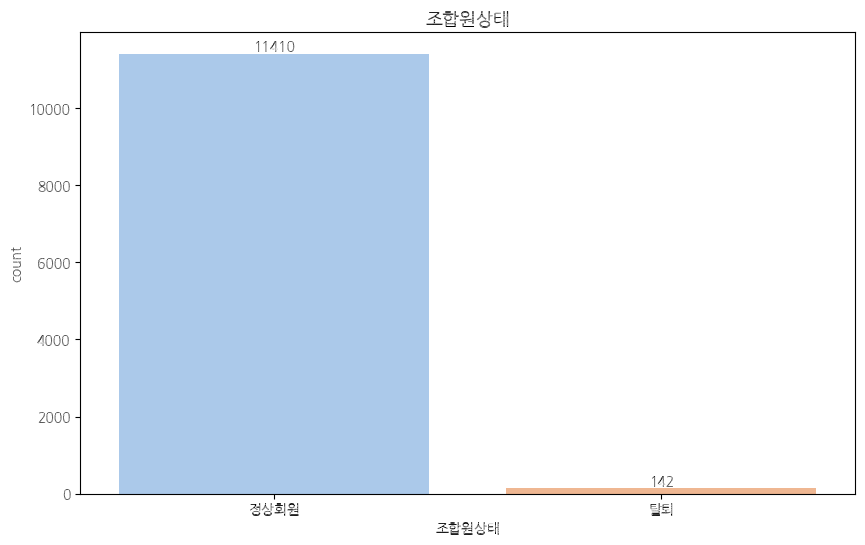

In [280]:
#조합원상태 수정후 그래프
plc_counts = df['조합원상태'].value_counts().sort_index()
print(plc_counts)

fig, ax = plt.subplots(figsize=(10, 6))

colors = sns.color_palette("pastel", len(plc_counts))

p = sns.countplot(x='조합원상태', data=df, ax=ax, palette=colors, order=plc_counts.index)
p.bar_label(p.containers[0], fmt='%d')  

ax.set_title('조합원상태', fontsize=13) 
plt.show()

남      668
여    10884
Name: 성별, dtype: int64


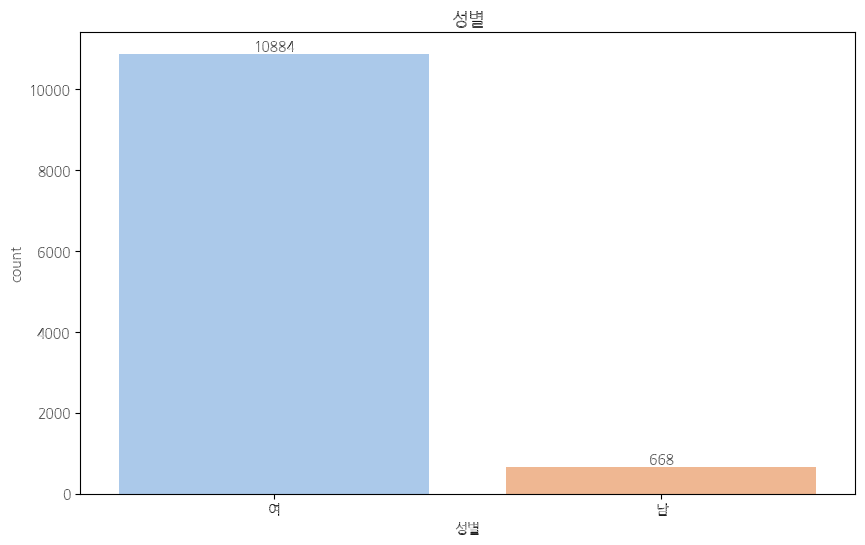

In [281]:
#성별 수정후 그래프
plc_counts = df['성별'].value_counts().sort_index()
print(plc_counts)

fig, ax = plt.subplots(figsize=(10, 6))

colors = sns.color_palette("pastel", len(plc_counts))  

p = sns.countplot(x='성별', data=df, ax=ax, palette=colors, order=['여', '남'])  
p.bar_label(p.containers[0], fmt='%d')  

ax.set_title('성별', fontsize=13) 
plt.show()

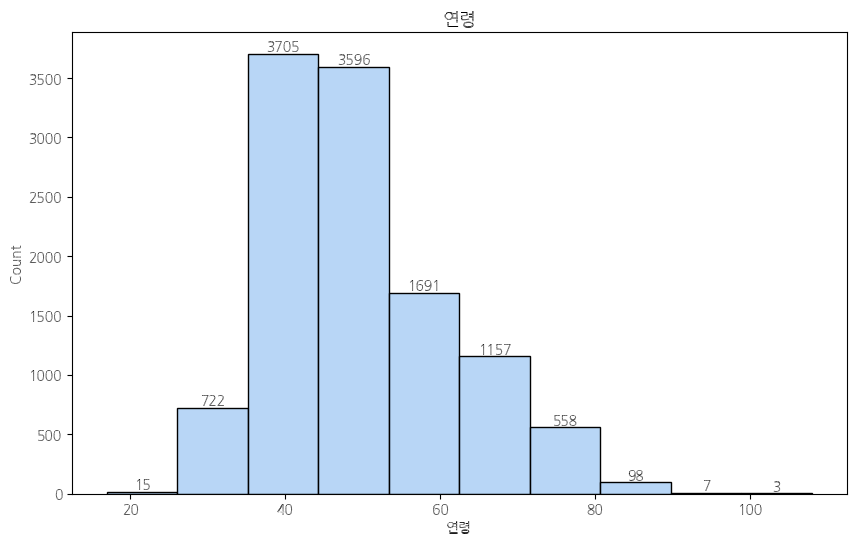

In [282]:
#연령 그래프
fig, ax = plt.subplots(figsize=(10, 6))

colors = sns.color_palette("pastel", 1)
sns.histplot(df['연령'], bins=10, kde=False, ax=ax, color=colors[0])  

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

ax.set_title('연령', fontsize=13)  

plt.show()

In [283]:
df.to_csv("preprocessed_member.csv",encoding='euc-kr',index=False)

# 2. product_data 1,2,3,4 전처리

In [284]:
pd.options.display.max_rows = 20

## data 1,2,3,4 합치기

In [285]:
df1=pd.read_csv("/home/piai/바탕화면/_/Bigdata final project/product_data_001.csv",encoding="euc-kr")
df2=pd.read_csv("/home/piai/바탕화면/_/Bigdata final project/product_data_002.csv",encoding="euc-kr")
df3=pd.read_csv("/home/piai/바탕화면/_/Bigdata final project/product_data_003.csv",encoding="euc-kr")
df4=pd.read_csv("/home/piai/바탕화면/_/Bigdata final project/product_data_004.csv",encoding="euc-kr")
df_combined = pd.concat([df1, df2, df3, df4], axis=0).reset_index(drop=True)
df = df_combined.drop(columns=["Unnamed: 0.1", "Unnamed: 0"])
df.to_csv("raw_product_combined.csv",encoding='euc-kr',index=False)
# Display the combined DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294645 entries, 0 to 294644
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   공급일자    294645 non-null  object 
 1   회원번호    294645 non-null  int64  
 2   조합원상태   294645 non-null  object 
 3   물품대분류   294645 non-null  object 
 4   물품중분류   294645 non-null  object 
 5   물품소분류   294645 non-null  object 
 6   물품명     294645 non-null  object 
 7   구매수량    294645 non-null  float64
 8   구매금액    294645 non-null  int64  
 9   구매매장    294645 non-null  object 
 10  구매시각    294645 non-null  object 
 11  반품일자    4960 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 27.0+ MB


In [286]:
#회원번호 object로 변경
df['회원번호'] = df['회원번호'].astype('object')
df

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,구매시각,반품일자
0,2023-01-06,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207,매장C,10:04,NaN
1,2023-01-06,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403,매장C,10:09,NaN
2,2023-01-06,743192512,정상회원,채소,양념채소,생강,생강(300g),1.0,7083,매장C,10:12,NaN
3,2023-01-06,176912064,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),1.0,7849,매장C,10:23,NaN
4,2023-01-06,87592064,정상회원,양념/가루,가루,양념가루,카레(매운맛: 100g),3.0,15507,매장C,10:29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
294640,2023-11-04,1110819712,정상회원,채소,뿌리채소,무,무(0.7~1kg미만),1.0,2680,매장A,13:26,NaN
294641,2023-11-04,1517953728,정상회원,채소,양념채소,쪽파,쪽파(500g),1.0,4212,매장A,10:58,NaN
294642,2023-11-04,713691392,정상회원,반찬,밑반찬,조림,우엉조림(반찬용/150g),1.0,7658,매장A,14:36,NaN
294643,2023-11-04,247926336,정상회원,간식,빵,건강곡물빵,감자바게트(180g)/매장,1.0,5169,매장A,16:23,NaN


In [287]:
df.isnull().sum()

공급일자          0
회원번호          0
조합원상태         0
물품대분류         0
물품중분류         0
물품소분류         0
물품명           0
구매수량          0
구매금액          0
구매매장          0
구매시각          0
반품일자     289685
dtype: int64

## 구매수량, 구매금액 이상치 수정

## 이상치 제거 전 변수별 분포

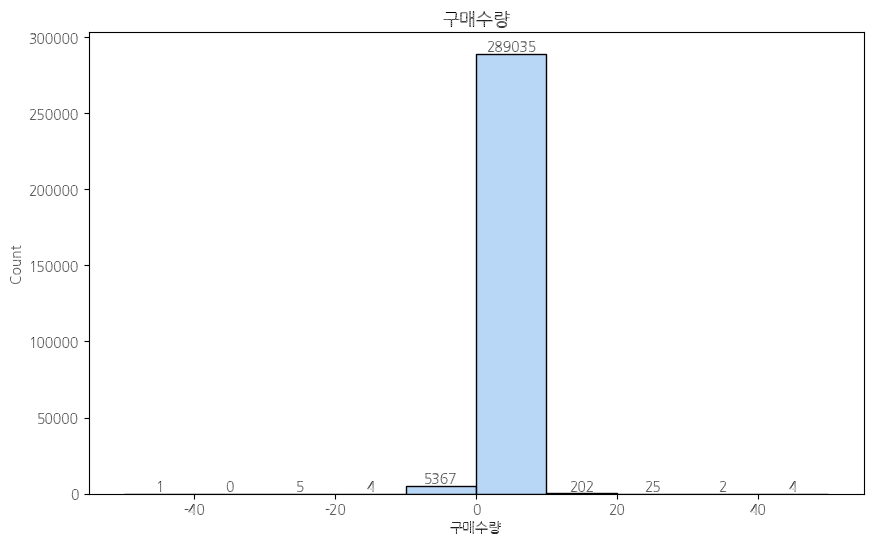

In [288]:
fig, ax = plt.subplots(figsize=(10, 6))

colors = sns.color_palette("pastel", 1)
sns.histplot(df['구매수량'], bins=10, kde=False, ax=ax, color=colors[0])  

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

ax.set_title('구매수량', fontsize=13)  

plt.show()

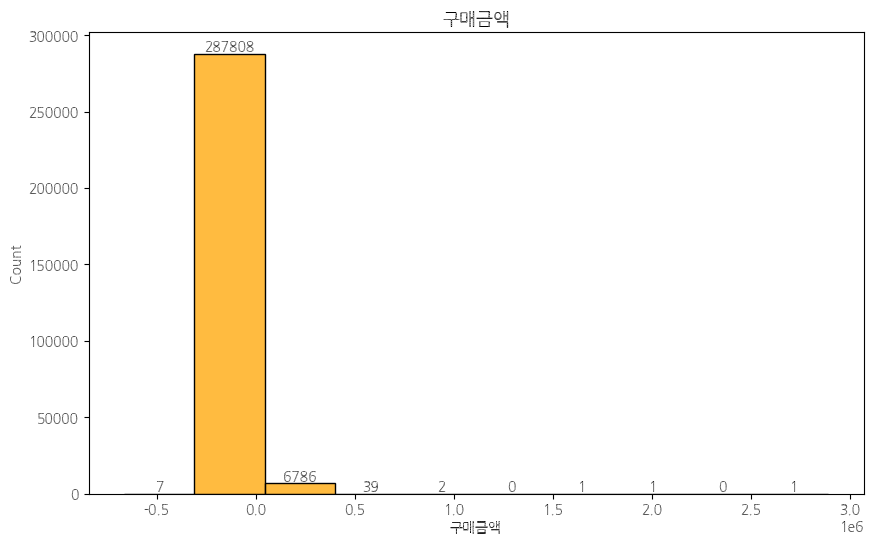

In [289]:
fig, ax = plt.subplots(figsize=(10, 6))

colors = sns.color_palette("pastel", 2)
sns.histplot(df['구매금액'], bins=10, kde=False, ax=ax, color='orange')  

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

ax.set_title('구매금액', fontsize=13)  

plt.show()

## 반품 데이터(구매금액<0) 중 구매 이력 없는 데이터 제거

In [290]:
# 1단계: 구매금액이 음수인 항목 (환불된 것) 필터링
refunds = df[df["구매금액"] < 0]

# 2단계: 구매금액이 양수인 항목 필터링
purchases = df[df["구매금액"] > 0]

# 3단계: 물품명과 회원번호가 동일한 항목 병합
merged_refunds = pd.merge(
    refunds,
    purchases,
    on=["물품명", "회원번호"],
    suffixes=("_환불", "_구매")
)

# 4단계: 완전 매칭된 항목 (구매금액 절대값이 동일한 경우)
exact_matches = merged_refunds[merged_refunds["구매금액_환불"].abs() == merged_refunds["구매금액_구매"].abs()]

# 5단계: 부분 환불 항목 (구매수량이 환불수량보다 큰 경우)
partial_refunds = merged_refunds[(merged_refunds["구매수량_구매"].abs()  > merged_refunds["구매수량_환불"].abs())]

# 6단계: 미매칭된 환불 항목 재정의 (모든 환불에서 exact_matches, partial_refunds 제외)
matched_indices = pd.concat([exact_matches, partial_refunds]).index
unmatched_refunds = refunds[~refunds.index.isin(matched_indices)]
unmatched_refunds.to_csv("반품데이터_제거.csv",encoding="euc-kr",index=False)
unmatched_refunds

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,구매시각,반품일자
129,2023-01-06,742641280,정상회원,간식,밀가공,만두,고기만두(500g),-1.0,-10338,매장C,18:25,2023-01-09
136,2023-01-06,978221504,정상회원,채소,뿌리채소,월동무,월동무(1.2kg이상),-1.0,-3733,매장C,19:55,2023-01-08
374,2023-01-06,307080768,정상회원,반찬,어묵/묵,어묵,명태참어묵(300g),-1.0,-7275,매장C,16:45,2023-01-07
453,2023-01-06,742641280,정상회원,과실,과일,단감,단감/유(대:5개),-1.0,-13975,매장C,18:25,2023-01-09
459,2023-01-06,978221504,정상회원,채소,버섯,표고버섯,생표고버섯(300g),-1.0,-9476,매장C,19:55,2023-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...
294227,2023-11-02,135862912,정상회원,수산,해조,기타해조류,마른청각(100g),-1.0,-7658,매장A,11:35,2023-11-03
294255,2023-11-02,1352610112,정상회원,생활용품,섬유,성인,오가닉코튼 라운드넥 반소매 티셔츠(XL/회색/남성),-1.0,-29482,매장A,12:29,2023-11-04
294608,2023-11-04,1020384256,정상회원,축산물,알,유정란,유정란/매장용(15알/국내산),-1.0,-10338,매장A,11:27,NaN
294625,2023-11-04,419628608,정상회원,양념/가루,가루,고춧가루,고춧가루/유(2kg/양념용),-2.0,-356081,매장A,15:48,2023-11-05


회원번호, 물품명이 같은게 없는 반품 데이터 5288개 모두 제거

In [291]:
# 7단계: df에서 unmatched_refunds에 속하는 행 제거
df_filtered = df[~df.index.isin(unmatched_refunds.index)]

# 결과 확인
df_filtered

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,구매시각,반품일자
0,2023-01-06,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207,매장C,10:04,NaN
1,2023-01-06,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403,매장C,10:09,NaN
2,2023-01-06,743192512,정상회원,채소,양념채소,생강,생강(300g),1.0,7083,매장C,10:12,NaN
3,2023-01-06,176912064,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),1.0,7849,매장C,10:23,NaN
4,2023-01-06,87592064,정상회원,양념/가루,가루,양념가루,카레(매운맛: 100g),3.0,15507,매장C,10:29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
294640,2023-11-04,1110819712,정상회원,채소,뿌리채소,무,무(0.7~1kg미만),1.0,2680,매장A,13:26,NaN
294641,2023-11-04,1517953728,정상회원,채소,양념채소,쪽파,쪽파(500g),1.0,4212,매장A,10:58,NaN
294642,2023-11-04,713691392,정상회원,반찬,밑반찬,조림,우엉조림(반찬용/150g),1.0,7658,매장A,14:36,NaN
294643,2023-11-04,247926336,정상회원,간식,빵,건강곡물빵,감자바게트(180g)/매장,1.0,5169,매장A,16:23,NaN


## 공급 일자 date-time로 변환

In [292]:
# '공급일자' 열을 datetime 형식으로 변환
df_filtered['공급일자'] = pd.to_datetime(df_filtered['공급일자'], errors='coerce')

# '공급일자'에서 년, 월, 일 열 생성
df_filtered['공급년도'] = df_filtered['공급일자'].dt.year
df_filtered['공급월'] = df_filtered['공급일자'].dt.month
df_filtered['공급일'] = df_filtered['공급일자'].dt.day

In [293]:
# 공급일자 제거
df_filtered = df_filtered.drop('공급일자', axis=1)

# 구매수량, 구매금액 모두 0 인것 제거

In [294]:
df_check = df_filtered[(df_filtered["구매수량"] == 0) & (df_filtered["구매금액"] == 0)]
df_check

,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,구매시각,반품일자,공급년도,공급월,공급일
2174,675322304,정상회원,간식,빵,"찐빵,호떡,전통",쑥찐빵(400g/5개)/매장,0.0,0,매장C,10:41,NaN,2023,1,10
7149,443533888,정상회원,간식,빵,"케이크,롤,선물",녹차롤케이크(420g),0.0,0,매장C,10:57,NaN,2023,1,22
10537,561061376,정상회원,서류,감자,감자,감자/소(1kg),0.0,0,매장C,16:49,NaN,2023,1,30
17334,584450688,정상회원,과실,과일,사과,사과/(2kg)/대,0.0,0,매장C,14:08,NaN,2023,2,14
20327,572427520,정상회원,채소,뿌리채소,더덕,더덕(500g/무),0.0,0,매장C,11:53,NaN,2023,2,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245979,64306688,정상회원,서류,고구마,고구마,황금고구마(1kg),0.0,0,매장A,13:51,NaN,2023,1,27
261059,1394771008,정상회원,채소,버섯,목이버섯,목이버섯(200g),0.0,0,매장A,11:39,NaN,2023,4,22
266982,1259964160,정상회원,간식,빵,"식빵, 식사대용",쌀식빵(360g)/매장,0.0,0,매장A,13:18,NaN,2023,5,28
282549,86983296,정상회원,축산물,육가공,햄/소시지/훈제,불고기양념소시지(300g)-매장,0.0,0,매장A,14:40,NaN,2023,8,24


In [295]:
#구매수량과 구매금액이 0 인 이상치 데이터 삭제
df_filtered=df_filtered[~((df_filtered["구매수량"] == 0) & (df_filtered["구매금액"] == 0))]
df_filtered

,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,구매시각,반품일자,공급년도,공급월,공급일
0,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207,매장C,10:04,NaN,2023,1,6
1,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403,매장C,10:09,NaN,2023,1,6
2,743192512,정상회원,채소,양념채소,생강,생강(300g),1.0,7083,매장C,10:12,NaN,2023,1,6
3,176912064,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),1.0,7849,매장C,10:23,NaN,2023,1,6
4,87592064,정상회원,양념/가루,가루,양념가루,카레(매운맛: 100g),3.0,15507,매장C,10:29,NaN,2023,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294640,1110819712,정상회원,채소,뿌리채소,무,무(0.7~1kg미만),1.0,2680,매장A,13:26,NaN,2023,11,4
294641,1517953728,정상회원,채소,양념채소,쪽파,쪽파(500g),1.0,4212,매장A,10:58,NaN,2023,11,4
294642,713691392,정상회원,반찬,밑반찬,조림,우엉조림(반찬용/150g),1.0,7658,매장A,14:36,NaN,2023,11,4
294643,247926336,정상회원,간식,빵,건강곡물빵,감자바게트(180g)/매장,1.0,5169,매장A,16:23,NaN,2023,11,4


In [296]:
#삭제 확인
df_filtered[(df_filtered["구매수량"] == 0) & (df_filtered["구매금액"] == 0)]

,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,구매시각,반품일자,공급년도,공급월,공급일


구매수량 = 0 그리고 구매금액 = 0 인 애들은 이상치로 판단 후 제거

# 구매금액 1, 구매금액 0 인 것 중 프로모션 아닌 것 

In [297]:
df_check = df_filtered[(df_filtered["구매수량"] == 1) & (df_filtered["구매금액"] == 0) & 
               (df_filtered["물품소분류"] != '기타') & 
                (df_filtered["물품소분류"] != '장려품')&
                (~df_filtered["물품명"].str.contains("증정", na=False))]
df_check

,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,구매시각,반품일자,공급년도,공급월,공급일
17988,675248064,정상회원,축산물,중량(정육),돼지(중량),통삼겹-성남용인,1.0,0,매장C,10:48,NaN,2023,2,16
109050,1009565632,정상회원,축산물,중량(정육),돼지(중량),삼겹살구이-성남용인,1.0,0,매장C,18:06,NaN,2023,9,26


In [298]:
average_value = df_filtered[df_filtered["물품명"] == "통삼겹-성남용인"]["구매금액"].mean()

# 평균값이 NaN이 아닐 경우에만 대체
if pd.notna(average_value):
    # 조건에 맞는 이상치를 평균값으로 대체
    df_filtered.loc[(df_filtered["물품명"] == "통삼겹-성남용인") & 
                    (df_filtered["구매수량"] == 1) & 
                    (df_filtered["구매금액"] == 0), "구매금액"] = average_value


In [299]:
average_value = df_filtered[df_filtered["물품명"] == "삼겹살구이-성남용인"]["구매금액"].mean()

# 평균값이 NaN이 아닐 경우에만 대체
if pd.notna(average_value):
    # 조건에 맞는 이상치를 평균값으로 대체
    df_filtered.loc[(df_filtered["물품명"] == "삼겹살구이-성남용인") & 
             (df_filtered["구매수량"] == 1) & 
             (df_filtered["구매금액"] == 0), "구매금액"] = average_value


통삼겹 구이, 삼겹살 구이는 평균값으로 대체

# 구매금액 1, 구매금액 0 인 것 중 프로모션 

In [300]:
df_check = df_filtered[(df_filtered["구매수량"] == 1) & (df_filtered["구매금액"] == 0)]
df_check.to_csv("promotion.csv",encoding='euc-kr',index=False)

In [301]:
# df_check에 해당하는 행을 df_filtered에서 제거
df_filtered = df_filtered[~df_filtered.index.isin(df_check.index)]

# 결과 확인
df_filtered


,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,구매시각,반품일자,공급년도,공급월,공급일
0,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207.0,매장C,10:04,NaN,2023,1,6
1,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403.0,매장C,10:09,NaN,2023,1,6
2,743192512,정상회원,채소,양념채소,생강,생강(300g),1.0,7083.0,매장C,10:12,NaN,2023,1,6
3,176912064,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),1.0,7849.0,매장C,10:23,NaN,2023,1,6
4,87592064,정상회원,양념/가루,가루,양념가루,카레(매운맛: 100g),3.0,15507.0,매장C,10:29,NaN,2023,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294640,1110819712,정상회원,채소,뿌리채소,무,무(0.7~1kg미만),1.0,2680.0,매장A,13:26,NaN,2023,11,4
294641,1517953728,정상회원,채소,양념채소,쪽파,쪽파(500g),1.0,4212.0,매장A,10:58,NaN,2023,11,4
294642,713691392,정상회원,반찬,밑반찬,조림,우엉조림(반찬용/150g),1.0,7658.0,매장A,14:36,NaN,2023,11,4
294643,247926336,정상회원,간식,빵,건강곡물빵,감자바게트(180g)/매장,1.0,5169.0,매장A,16:23,NaN,2023,11,4


증정값들은 삭제 추후 프로모션 분석에서 활용

# 반품일자 중 구매금액 양수

In [302]:
#반품일자가 NaN이 아닌 값들 출력
non_na_refund_dates = df_filtered[df_filtered["반품일자"].notna()]

# 결과를 데이터프레임 형태로 출력
non_na_refund_dates

,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,구매시각,반품일자,공급년도,공급월,공급일
196,742641280,정상회원,축산물,돼지,보리살림돼지,불고기용(600g/우리보리살림돼지),-1.0,-16847.0,매장C,18:25,2023-01-07,2023,1,6
197,742641280,정상회원,채소,잎/줄기채소,시금치,시금치(300g),-1.0,-4403.0,매장C,18:25,2023-01-07,2023,1,6
258,742641280,정상회원,양념/가루,기름/식초,기름,참기름(330ml),-1.0,-48052.0,매장C,18:25,2023-01-07,2023,1,6
317,54078272,정상회원,수산,해조,미역/다시마,다시마(200g),-1.0,-6892.0,매장C,18:13,2023-01-07,2023,1,6
326,978221504,정상회원,과실,과일,레몬,"레몬/유,무(소:500g)",-1.0,-9955.0,매장C,19:55,2023-01-07,2023,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195787,577824768,정상회원,기타,비물품,기타,중성세제 샘플(증정/100㎖),-1.0,0.0,매장B,19:32,2023-03-29,2023,3,28
231285,769577408,정상회원,수산,냉동수산,냉동생선,민어전부침용(300g),1.0,29482.0,매장B,14:36,2023-09-13,2023,9,11
242924,151032000,정상회원,과실,과일,참다래,참다래(골드:2kg),1.0,28333.0,매장A,11:53,2023-01-11,2023,1,10
256513,768621568,정상회원,기타,비물품,기타,중성세제 샘플(증정/100㎖),-1.0,0.0,매장A,14:39,2023-03-28,2023,3,27


In [303]:
df_filtered[(df_filtered["회원번호"] ==1568895360 )&(df_filtered['물품명']=='백미/유(4kg)-매장용')]

,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,구매시각,반품일자,공급년도,공급월,공급일
44056,1568895360,정상회원,주곡,멥쌀,멥쌀,백미/유(4kg)-매장용,1.0,30056.0,매장C,18:56,NaN,2023,4,22
45628,1568895360,정상회원,주곡,멥쌀,멥쌀,백미/유(4kg)-매장용,1.0,30056.0,매장C,16:21,2023-04-30,2023,4,27


In [304]:
# 조건 설정
condition = (df_filtered["회원번호"] == 1568895360) & \
            (df_filtered['물품명'] == '백미/유(4kg)-매장용') & \
            (df_filtered["반품일자"].notna())

# 해당 조건에 맞는 데이터의 구매금액과 구매수량을 음수로 직접 변경
df_filtered.loc[condition, '구매금액'] = -abs(df_filtered.loc[condition, '구매금액'])
df_filtered.loc[condition, '구매수량'] = -abs(df_filtered.loc[condition, '구매수량'])

In [305]:
df_filtered[(df_filtered["회원번호"] ==1568895360 )&(df_filtered['물품명']=='백미/유(4kg)-매장용')]

,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,구매시각,반품일자,공급년도,공급월,공급일
44056,1568895360,정상회원,주곡,멥쌀,멥쌀,백미/유(4kg)-매장용,1.0,30056.0,매장C,18:56,NaN,2023,4,22
45628,1568895360,정상회원,주곡,멥쌀,멥쌀,백미/유(4kg)-매장용,-1.0,-30056.0,매장C,16:21,2023-04-30,2023,4,27


In [306]:
df_filtered[(df_filtered["회원번호"] ==416556928 )&(df_filtered['물품명']=='사과/(2kg)/대')]

,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,구매시각,반품일자,공급년도,공급월,공급일
145288,416556928,정상회원,과실,과일,사과,사과/(2kg)/대,1.0,20293.0,매장D,19:48,2023-05-10,2023,5,8


In [307]:
condition = (df_filtered["회원번호"] == 416556928) & (df_filtered['물품명'] == '사과/(2kg)/대')

# 조건에 맞는 데이터의 인덱스를 찾기
indices_to_delete = df_filtered[condition].index

# 해당 인덱스를 사용하여 데이터 삭제
df_filtered = df_filtered.drop(indices_to_delete)

In [308]:
#사과를 구매하지 않고 반품이 되어있어 삭제 후 확인
df_filtered[(df_filtered["회원번호"] ==416556928 )&(df_filtered['물품명']=='사과/(2kg)/대')]

,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,구매시각,반품일자,공급년도,공급월,공급일


In [309]:
df_filtered[(df_filtered["회원번호"] ==151032000 )&(df_filtered['물품명']=='참다래(골드:2kg)')]

,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,구매시각,반품일자,공급년도,공급월,공급일
242898,151032000,정상회원,과실,과일,참다래,참다래(골드:2kg),1.0,28333.0,매장A,11:28,NaN,2023,1,10
242924,151032000,정상회원,과실,과일,참다래,참다래(골드:2kg),1.0,28333.0,매장A,11:53,2023-01-11,2023,1,10


In [310]:
# 삭제할 조건 설정
condition = (df_filtered["회원번호"] == 151032000) & \
            (df_filtered['물품명'] == '참다래(골드:2kg)') & \
            (df_filtered["반품일자"].notna()) & \
            (df_filtered["구매금액"] >= 0)

# 조건에 맞는 데이터의 인덱스를 찾기
indices_to_delete = df_filtered[condition].index

# 해당 인덱스를 사용하여 데이터 삭제
df_filtered = df_filtered.drop(indices_to_delete)

In [311]:
#참다래 이상치 확인 후 삭제
df_filtered[(df_filtered["회원번호"] ==151032000 )&(df_filtered['물품명']=='참다래(골드:2kg)')&(df_filtered["반품일자"].notna())&(df_filtered["구매금액"]>=0)]

,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,구매시각,반품일자,공급년도,공급월,공급일


# member랑 product 데이터 합치기

In [312]:
member=pd.read_csv("preprocessed_member.csv",encoding='euc-kr')

In [313]:
df_merged = pd.merge(df_filtered, member, on="회원번호", how="left")

In [314]:
pd.options.display.max_rows = False
df_merged.isnull().sum()

회원번호                0
조합원상태_x             0
물품대분류               0
물품중분류               0
물품소분류               0
물품명                 0
구매수량                0
구매금액                0
구매매장                0
구매시각                0
반품일자           288822
공급년도                0
공급월                 0
공급일                 0
조합원상태_y            20
성별                 20
연령                 20
배송서비스신청여부          20
모바일알람여부            20
Gold_member        20
주소대분류              20
주소소분류              20
dtype: int64

구매이력은 있는 데 member 데이터에 없는 값들 제거

In [315]:
# 성별 열에서 결측값이 있는 행 제거
df_merged = df_merged.dropna(subset=["성별"])

# 결과 확인
df_merged.isnull().sum()


회원번호                0
조합원상태_x             0
물품대분류               0
물품중분류               0
물품소분류               0
물품명                 0
구매수량                0
구매금액                0
구매매장                0
구매시각                0
반품일자           288802
공급년도                0
공급월                 0
공급일                 0
조합원상태_y             0
성별                  0
연령                  0
배송서비스신청여부           0
모바일알람여부             0
Gold_member         0
주소대분류               0
주소소분류               0
dtype: int64

In [316]:
# 불필요한 열 삭제
df_merged = df_merged.drop(columns=["조합원상태_y", "반품일자"])

# 열 이름 변경
df_merged = df_merged.rename(columns={"조합원상태_x": "조합원상태"})

# 결과 확인
df_merged


,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,구매시각,공급년도,공급월,공급일,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,주소대분류,주소소분류
0,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207.0,매장C,10:04,2023,1,6,여,45.0,미신청,수신,VIP,용인 수지구,풍덕천동
1,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403.0,매장C,10:09,2023,1,6,여,34.0,미신청,미수신,normal,용인 수지구,풍덕천동
2,743192512,정상회원,채소,양념채소,생강,생강(300g),1.0,7083.0,매장C,10:12,2023,1,6,여,51.0,신청,미수신,normal,용인 수지구,성복동
3,176912064,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),1.0,7849.0,매장C,10:23,2023,1,6,여,69.0,미신청,미수신,VIP,용인 수지구,풍덕천동
4,87592064,정상회원,양념/가루,가루,양념가루,카레(매운맛: 100g),3.0,15507.0,매장C,10:29,2023,1,6,여,73.0,미신청,미수신,normal,용인 수지구,풍덕천동
5,1206815744,정상회원,채소,양념채소,대파,대파(700g),1.0,5265.0,매장C,10:39,2023,1,6,여,42.0,미신청,수신,VIP,용인 수지구,풍덕천동
6,740918912,정상회원,채소,열매채소,애호박,쥬키니호박(1개),1.0,3255.0,매장C,10:57,2023,1,6,여,40.0,미신청,수신,normal,용인 수지구,풍덕천동
7,1343359808,정상회원,채소,콩나물,콩나물,콩나물(300g),1.0,2489.0,매장C,11:07,2023,1,6,여,49.0,미신청,수신,VIP,용인 수지구,풍덕천동
8,246287488,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083.0,매장C,11:18,2023,1,6,여,53.0,미신청,미수신,normal,용인 수지구,풍덕천동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [317]:
df_merged.to_csv("preprocessed_product.csv",encoding='euc-kr',index=False)